Fetching weather data...
             datetime  temperature  humidity     weather
0 2025-01-31 17:30:00         2.61        85  light rain
1 2025-01-31 20:30:00         2.57        92  light rain
2 2025-01-31 23:30:00         2.56        99  light rain
3 2025-02-01 02:30:00         2.71        99  light rain
4 2025-02-01 05:30:00         2.92       100  light rain
Visualizing data...


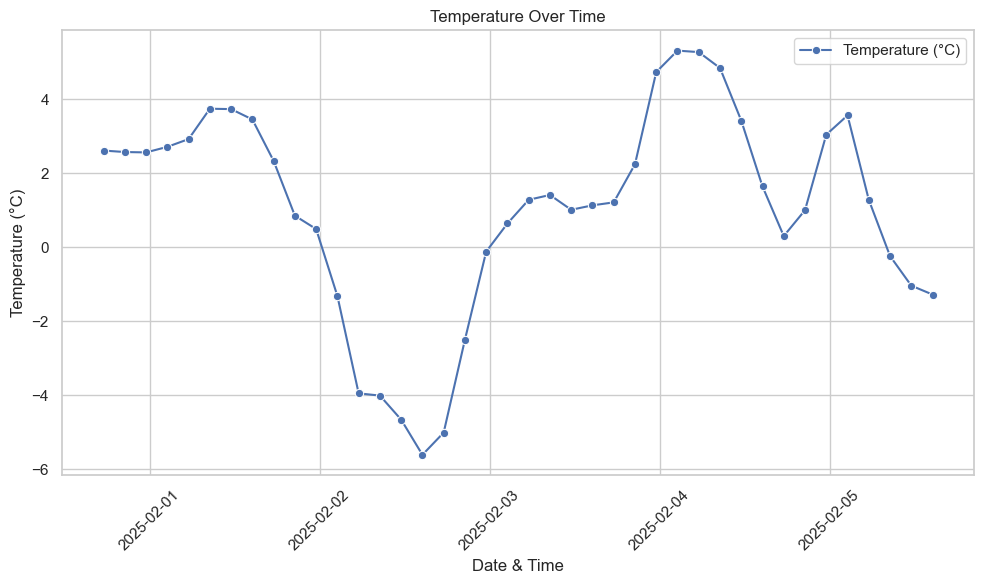

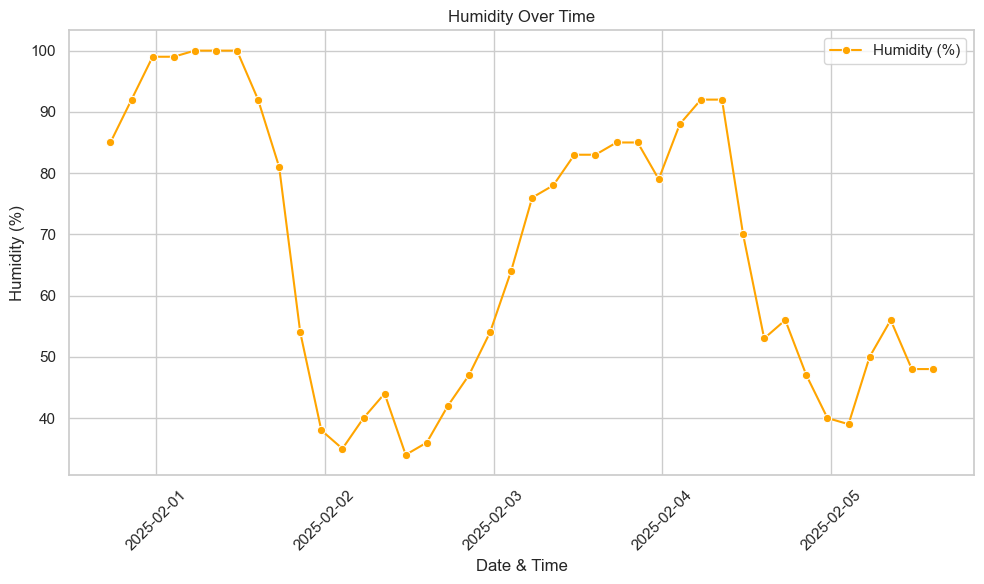

C:\Users\dayak\AppData\Local\Temp\ipykernel_17632\4261076854.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='weather', data=weather_df, order=weather_df['weather'].value_counts().index, palette="viridis")


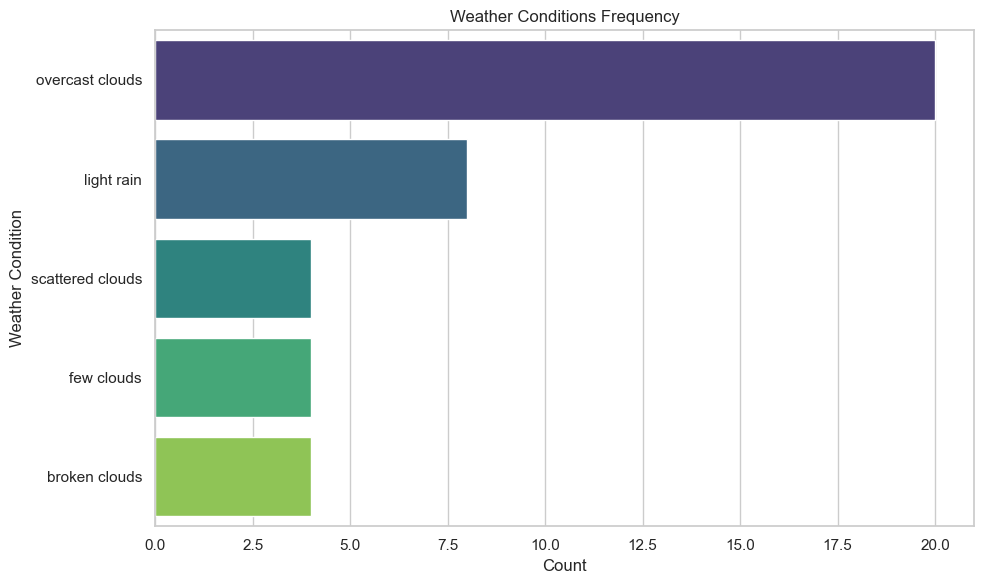

In [2]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

# Replace with your OpenWeatherMap API Key
API_KEY = '0d666b8cfbffa7bb89c8f687557bf80c'
CITY = 'New York'
BASE_URL = 'https://api.openweathermap.org/data/2.5/forecast'

# Fetch weather data
def fetch_weather_data(city, api_key):
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric'  # Get temperature in Celsius
    }
    response = requests.get(BASE_URL, params=params)
    response.raise_for_status()
    return response.json()

# Parse weather data
def parse_weather_data(data):
    forecast_list = data['list']
    parsed_data = {
        'datetime': [],
        'temperature': [],
        'humidity': [],
        'weather': [],
    }
    for forecast in forecast_list:
        parsed_data['datetime'].append(datetime.datetime.fromtimestamp(forecast['dt']))
        parsed_data['temperature'].append(forecast['main']['temp'])
        parsed_data['humidity'].append(forecast['main']['humidity'])
        parsed_data['weather'].append(forecast['weather'][0]['description'])
    return pd.DataFrame(parsed_data)

# Create visualizations
def visualize_weather_data(weather_df):
    sns.set(style="whitegrid")

    # Temperature over time
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='datetime', y='temperature', data=weather_df, marker="o", label="Temperature (°C)")
    plt.title('Temperature Over Time')
    plt.xlabel('Date & Time')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Humidity over time
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='datetime', y='humidity', data=weather_df, marker="o", label="Humidity (%)", color="orange")
    plt.title('Humidity Over Time')
    plt.xlabel('Date & Time')
    plt.ylabel('Humidity (%)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Weather conditions
    plt.figure(figsize=(10, 6))
    sns.countplot(y='weather', data=weather_df, order=weather_df['weather'].value_counts().index, palette="viridis")
    plt.title('Weather Conditions Frequency')
    plt.xlabel('Count')
    plt.ylabel('Weather Condition')
    plt.tight_layout()
    plt.show()

# Execution in Jupyter
try:
    print("Fetching weather data...")
    data = fetch_weather_data(CITY, API_KEY)
    weather_df = parse_weather_data(data)
    print(weather_df.head())

    print("Visualizing data...")
    visualize_weather_data(weather_df)

except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
except Exception as e:
    print(f"An error occurred: {e}")